![ieseg logo](./img/ieseg.png)

#### MBD 2020-2021
# Statistical & Machine Learning Approaches for Marketing

## Homework Section 1: Introduction & Linear Regression
- Exercise 2 (p.52, Chap.2), 10 (p.56, Chap.2), 3 (p.120, Chap.3), 10 (p.123, Chap.3) and 15 (p.126, Chap.3).

### Exercise 2 (p.52, Chap.2)

QUESTION - Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction.Finally, provide n and p. <br/> <br/>

(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the
CEO salary. We are interested in understanding which factors affect CEO salary.

(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product
we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the %change in the US market, the % change in the British market,and the % change in the German market.

ANSWERS - 

(a) <br/>
- It is a `Regression Problem` as the Response in this case is Negative. <br/>
- `Inference` as we want to understand how the predictors impact the salary of a CEO, and not actually predict the salary of a CEO. <br/>
- n=500, p=profit, number of employees, industry

(b) <br/>
- `Classification` as the response(success or failure) is a binary value. <br/>
- `Prediction` as we want to know predicted value of the target. <br/>
- n=20. p=price, marketing budget, competition price and 10 other variables.

(c) <br/>
- `Regression` as the response(% change in the USD/Euro) is a quantitative value. <br/>
- `Prediction` we want to predict the response. <br/>
- n=52. p=% change in US market, % change in UK market, % change in German market.

### Exercise 10 (p.56, Chap.2)

### Importing all required libraries and datasets

In [1]:
options(warn = -1)

In [2]:
# Installing packages
install.packages(c("data.table", "mlr3", "caret", "ggplot2", "plotrix", "rgl", "ISLR", "MASS", "datasets"))

package 'data.table' successfully unpacked and MD5 sums checked
package 'mlr3' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'plotrix' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'ISLR' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pbhurji\AppData\Local\Temp\Rtmpw1on1b\downloaded_packages


Answer(a) -

In [3]:
library(MASS)
head(Boston)
?Boston

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


There are `506` rows and `14` columns.

Each row reprensents an housing with their attributes. Each column represents a set of one attributes of a housing.

Answer(b) -

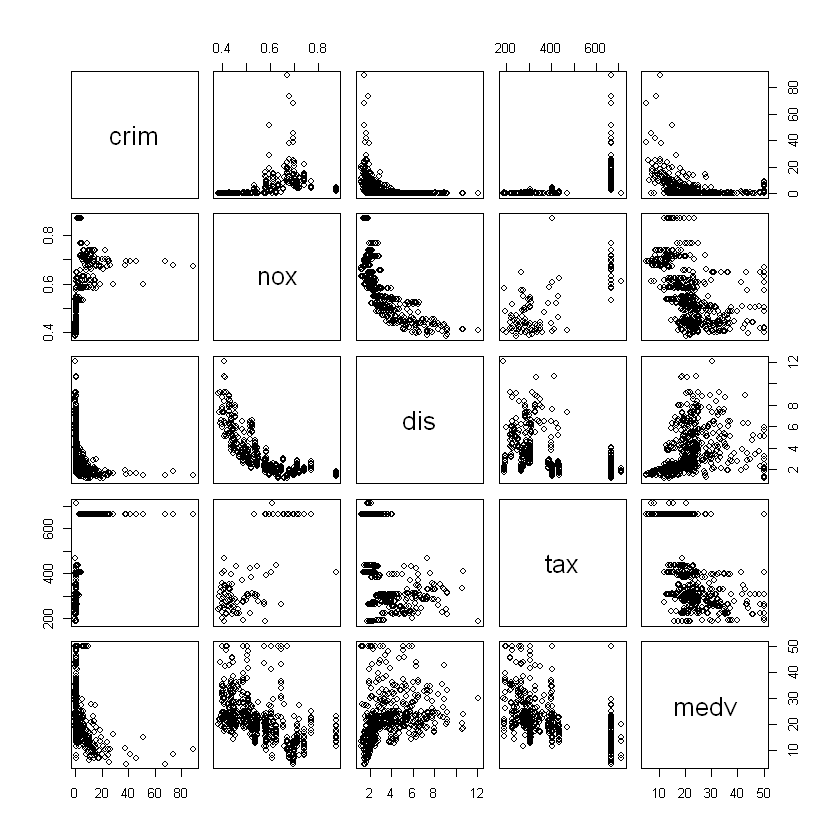

In [4]:
# Pair plots of some variables
pairs(~crim+nox+dis+tax+medv, data = Boston)

- `crim` seems to have a negative linear relationship with `medv` and `dis`.
- `nox` has a negative linear relationship with `dis`.
- `dis` has a positive linear relationship with `medv`.

Answer(c) -

In [5]:
# Correlation coefficients between CRIM and all other variables.
cor(Boston[-1],Boston$crim)

zn,-0.20046922
indus,0.40658341
chas,-0.05589158
nox,0.42097171
rm,-0.21924670
age,0.35273425
dis,-0.37967009
rad,0.62550515
tax,0.58276431
ptratio,0.28994558
black,-0.38506394


-  There are some correlations between `crim` and other variables, but they are not as strong as some of the relationships we observed in the `Auto` dataset. 
- `crim` has a negative linear relationship with `medv`, `dis` and `black`.
- `crim` has a positive linear relationship with `indus`, `nox`, `rad` and `tax`.

Answer(d) -

In [6]:
# Suburbs with crime rate higher than 2 s.d from the mean(higher than 95% of suburbs).
High.Crime = Boston[which(Boston$crim > mean(Boston$crim) + 2*sd(Boston$crim)),]
range(Boston$crim) ; mean(Boston$crim) ; sd(Boston$crim)

[1]  0.00632 88.97620

[1] 3.613524

[1] 8.601545

- There are 16 suburbs with a crime rate higher than 95% of the other suburbs.
- Some suburbs have extremely high rates of crime (5-8 s.d from the mean).
- The range is very wide, it goes from a rate of near zero to 89.

In [7]:
# Suburbs with tax rates higher than 2 s.d from the mean.
High.Tax = Boston[which(Boston$tax > mean(Boston$tax) + 2*sd(Boston$tax)),]
range(Boston$tax)

[1] 187 711

- There are no suburbs with a tax rate higher than 2 s.d. from the mean. This seems reasonable as property tax rates are designed not to be extremely drastic.
- The range is narrower than the crime rate.
- Some suburbs do have tax rates higher than 1 s.d.(higher than 65% of suburbs) from the mean.

In [8]:
# Suburbs with pupil teacher ratio higher than 2 s.d from the mean.
High.PT = Boston[which(Boston$ptratio > mean(Boston$ptratio) + 2*sd(Boston$ptratio)),]
range(Boston$ptratio)

[1] 12.6 22.0

- There are no suburbs with a high pupil to teacher ratio, and this a reasonable outcome as educational laws limit the numbers of teacher or students per class/school.
- The range in quite narrow, and and all pupil teacher ratios lie within 2 s.d. of the mean.
- Some pupil teacher ratios are higher than 1 s.d.

Answer(e) -

In [9]:
sum(Boston$chas==1)

[1] 35

There are `35` suburbs/towns bound the Charles river.

Answer(f) -

In [10]:
median(Boston$ptratio)

[1] 19.05

Answer(g) -

In [11]:
which(Boston$medv == min(Boston$medv))

[1] 399 406

There are two suburbs (399 & 406) that have the lowest median property values.

In [12]:
# Values of other predictors for suburb 399
Boston[399,]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.9,30.59,5


In [13]:
range(Boston$lstat)
range(Boston$ptratio)

[1]  1.73 37.97

[1] 12.6 22.0

`crim` is more than 2 s.d. above the mean - very high crime rates in this suburb. Both `ptratio`and `lstat` are close to their maximum values.

Answer(h) -

In [14]:
# More than 7 rooms
sum(Boston$rm > 7)

[1] 64

In [15]:
# More than 8 rooms
sum(Boston$rm > 8)

[1] 13

In [16]:
summary(Boston)
summary(subset(Boston, rm > 8))

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

Relatively low `crim`, `lstat` and much higher `medv` when comparing the IQR range.

### Exercise 3 (p.120, Chap.3)

ANSWERS - 

(a) iii is True; As males earn more on average than females after their GPA exceeds 3.5.

(b) 137.1K.

(c) False; In the case of the female with an IQ of 100 and a GPA of 4.0, the interaction term adds 17.6k to her final salary, and this represents around 15% of her final salary, therefore the impact of the interaction term is substantial but we have calculate the p-value of the coefficient to determine if it is statistically significant.

### Exercise 10 (p.123, Chap.3)

Answer(a) -

In [17]:
fix(Carseats)
carseats_lm = lm(Sales~Price+Urban+US,data=Carseats)
summary(carseats_lm)

ERROR: Error in as.data.frame.default(data, optional = TRUE): cannot coerce class '"function"' to a data.frame


### Exercise 15 (p.126, Chap.3)

In [18]:
library(MASS)
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [19]:
#Linear regression of per capita crime onto each variable.
lm.zn = lm(crim~zn, data=Boston)
lm.indus = lm(crim~indus, data=Boston)
lm.chas = lm(crim~chas, data=Boston)
lm.nox = lm(crim~nox, data=Boston)
lm.rm = lm(crim~rm, data=Boston)
lm.age = lm(crim~age, data=Boston)
lm.dis = lm(crim~dis, data=Boston)
lm.rad = lm(crim~rad, data=Boston)
lm.tax = lm(crim~tax, data=Boston)
lm.ptratio = lm(crim~ptratio, data=Boston)
lm.black = lm(crim~black, data=Boston)
lm.lstat = lm(crim~lstat, data=Boston)
lm.medv = lm(crim~medv, data=Boston)

Answer(b) & (c) -

In [20]:
# Regression using all predictors.
lm.fit_all = lm(crim~., data=Boston)
summary(lm.fit_all)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0